In [0]:
from google.colab import drive
drive.mount('/content/drive')
# !ls "/content/drive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import os
from os.path import isfile, join

import numpy as np
from numpy import shape, ones, uint8, float32, reshape, ndarray
from random import sample, choice
from numpy.random import randint, rand
from multiprocessing import Process
import matplotlib.pyplot as plt
from keras.layers import Softmax, ReLU
from keras.models import Sequential, Model, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam, Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras.applications import vgg16
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


NAME = "Facial-Expression-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))


current_path = os.getcwd()
current_path = join(current_path,'drive','My Drive')

print("Current : {}".format(current_path))

SIZE_WORD = 48
EMOTIONS = ['neutral', 'anger', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
SAVE_DIRECTORY = '/content/drive/My Drive/Facial_expression/Colab/'
SAVE_MODEL_FILENAME = 'CNN Trained model'
SAVE_DATASET_IMAGES_FILENAME = 'data_set_fer2013.npy'
SAVE_DATASET_LABELS_FILENAME = 'data_labels_fer2013.npy'
SAVE_DATASET_IMAGES_TEST_FILENAME = 'test_set_fer2013.npy'
SAVE_DATASET_LABELS_TEST_FILENAME = 'test_labels_fer2013.npy'
SAVE_DATASET_IMAGES_VALIDATION_FILENAME = 'PrivateTest_Data.npy'
SAVE_DATASET_LABELS_VALIDATION_FILENAME = 'PrivateTest_Labels.npy'

class DatasetLoader(object):

    def __init__(self):
        pass

    def load_from_save(self):
        self._images = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_IMAGES_FILENAME))
        self._labels      = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_LABELS_FILENAME))

        self._images_test = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_IMAGES_TEST_FILENAME))
        self._labels_test = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_LABELS_TEST_FILENAME))

        self._images_validation = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_IMAGES_VALIDATION_FILENAME))
        self._labels_validation = np.load(join(SAVE_DIRECTORY, SAVE_DATASET_LABELS_VALIDATION_FILENAME))

        self._images            = self._images.reshape([-1, SIZE_WORD, SIZE_WORD, 1])
        
        self._images            = np.concatenate((self._images,self._images,self._images), axis=3)
        self._images_test       = self._images_test.reshape([-1, SIZE_WORD, SIZE_WORD, 1])
        
        self._images_test       = np.concatenate((self._images_test,self._images_test,self._images_test), axis=3)
        self._images_validation = self._images_validation.reshape([-1, SIZE_WORD, SIZE_WORD, 1])
        self._images_validation = np.concatenate((self._images_validation,self._images_validation,self._images_validation), axis=3)

        self._labels            = self._labels.reshape([-1, len(EMOTIONS)])
        self._labels_test       = self._labels_test.reshape([-1, len(EMOTIONS)])
        self._labels_validation = self._labels_validation.reshape([-1, len(EMOTIONS)])

    #for training
    @property
    def images(self):
        #return np.concatenate((self._images, self._images, self._images), axis = 3)
        return self._images

    @property
    def labels(self):
        return self._labels

    #for validation
    @property
    def images_validation(self):
        #return np.concatenate((self._images_validation, self._images_validation, self._images_validation), axis = 3)
        return self._images_validation
      

    @property
    def labels_validation(self):
        return self._labels_validation

    #for test
    @property
    def images_test(self):
        #return np.concatenate((self._images_test, self._images_test, self._images_test), axis = 3)
        return self._images_test
    @property
    def labels_test(self):
        return self._labels_test

dataset_loader = DatasetLoader()
dataset_loader.load_from_save()
'''
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
'''

print(dataset_loader.images.shape)
print(dataset_loader.labels[0])
print(dataset_loader.images_validation.shape)
print(dataset_loader.labels_validation.shape)
print(dataset_loader.images_test.shape)
print(dataset_loader.labels_test.shape)

Using TensorFlow backend.


Current : /content/drive/My Drive
(28709, 48, 48, 3)
[1. 0. 0. 0. 0. 0. 0.]
(3589, 48, 48, 3)
(3589, 7)
(3589, 48, 48, 3)
(3589, 7)


In [0]:

#Layer1
model=Sequential()
model.add(Convolution2D(filters = 96,kernel_size =(3, 3),strides=(1, 1), padding='same', input_shape=(SIZE_WORD,SIZE_WORD,3),activation=None))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
model.add(BatchNormalization())

#Layer2
model.add(Convolution2D(filters = 108,kernel_size =(2, 2),strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='same'))
model.add(BatchNormalization())

#Layer3
model.add(Convolution2D(filters = 108,kernel_size =(2, 2),strides=(1, 1), padding='same'))
model.add(Convolution2D(filters = 64,kernel_size =(2, 2),strides=(1, 1), padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides=(1, 1), padding= 'same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(units=512,kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256,kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Softmax())
          
model.summary()

W0617 04:33:47.370600 139849014265728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 04:33:47.380803 139849014265728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 04:33:47.388892 139849014265728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 04:33:47.416260 139849014265728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0617 04:33:47.432103 139849014265728 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 108)       41580     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 108)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 108)       432       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 108)       46764     
__________

In [0]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-3), loss='categorical_crossentropy', metrics=['mae', 'acc'])
result = model.fit(dataset_loader.images, dataset_loader.labels, batch_size=128, shuffle = True,callbacks=[tensorboard], 
                   epochs=300,verbose=1,validation_data=(dataset_loader.images_test, dataset_loader.labels_test))

model_json = model.to_json()
with open("/content/drive/My Drive/data/Colab/model_4layer_2_2_pool.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/data/Colab/model_4layer_2_2_pool.h5")

Train on 28709 samples, validate on 3589 samples
Epoch 1/300
28709/28709 [==============================] - 15s 532us/step - loss: 3.4884 - mean_absolute_error: 0.2267 - acc: 0.2689 - val_loss: 3.1127 - val_mean_absolute_error: 0.2134 - val_acc: 0.3633
Epoch 2/300
28709/28709 [==============================] - 14s 496us/step - loss: 3.1438 - mean_absolute_error: 0.2133 - acc: 0.3407 - val_loss: 2.9606 - val_mean_absolute_error: 0.2065 - val_acc: 0.4285
Epoch 3/300
28709/28709 [==============================] - 14s 495us/step - loss: 2.9919 - mean_absolute_error: 0.2052 - acc: 0.3748 - val_loss: 2.8644 - val_mean_absolute_error: 0.2011 - val_acc: 0.4416
Epoch 4/300
28709/28709 [==============================] - 14s 492us/step - loss: 2.8717 - mean_absolute_error: 0.1998 - acc: 0.3961 - val_loss: 2.7360 - val_mean_absolute_error: 0.1946 - val_acc: 0.4675
Epoch 5/300
28709/28709 [==============================] - 14s 483us/step - loss: 2.7524 - mean_absolute_error: 0.1952 - acc: 0.4174 - 

KeyboardInterrupt: ignored

In [0]:
test_eval = model.evaluate(dataset_loader.images_test, dataset_loader.labels_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.947012968965479
Test accuracy: 0.5711897464516303


In [0]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(dataset_loader.images_test, batch_size=32)
matrix = confusion_matrix(dataset_loader.labels_test.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)
print(classification_report(dataset_loader.labels_test.argmax(axis=1),	predictions.argmax(axis=1), target_names=EMOTIONS))

[INFO] evaluating network...
[[209   1  41  66  84  12  54]
 [ 12  25   4   6   3   1   5]
 [ 52   2 185  50 114  43  50]
 [ 33   1  16 710  50  19  66]
 [ 69   0  67  82 320  15 100]
 [ 13   0  27  27  22 307  19]
 [ 45   1  43  87 128   9 294]]
              precision    recall  f1-score   support

     neutral       0.48      0.45      0.46       467
       anger       0.83      0.45      0.58        56
     disgust       0.48      0.37      0.42       496
        fear       0.69      0.79      0.74       895
       happy       0.44      0.49      0.47       653
     sadness       0.76      0.74      0.75       415
    surprise       0.50      0.48      0.49       607

   micro avg       0.57      0.57      0.57      3589
   macro avg       0.60      0.54      0.56      3589
weighted avg       0.57      0.57      0.57      3589



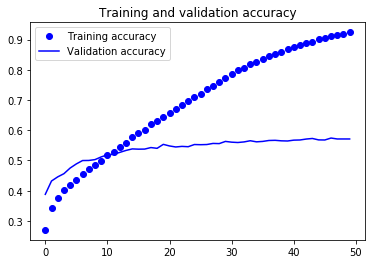

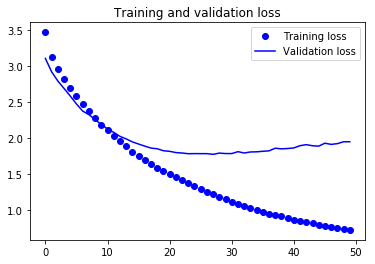

In [0]:
# Plotting the accuracy and loss plots between training and validation data:
accuracy = result.history['acc']
val_accuracy = result.history['val_acc']
loss = result.history['loss']
val_loss =result.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
padding='SAME'
network = input_data(shape = [None, 48, 48, 1])
conv_1=relu(conv_2d(network, 96, 3, strides=1, bias=True, padding=padding, activation=None, name='Conv_1'))
maxpool_1 = max_pool_2d(conv_1, 3, strides=2, padding=padding, name='MaxPool_1')
maxpool_1 = batch_normalization(maxpool_1)

conv_2 = relu(conv_2d(maxpool_1, 108, 2, strides=1, padding=padding, name='Conv_2'))
maxpool_2 = max_pool_2d(conv_2, 2, strides=1, padding=padding, name='MaxPool_2')
maxpool_2 = batch_normalization(maxpool_2)

conv_3 = relu(conv_2d(maxpool_2, 108, 2, strides=1, padding=padding, name='Conv_3'))
conv_4 = relu(conv_2d(conv_3, 64, 2, strides=1, padding=padding, name='Conv_4'))
maxpool_3 = max_pool_2d(conv_4, 2, strides=1, padding=padding, name='MaxPool_3')
maxpool_3 = batch_normalization(maxpool_3)

net = flatten(maxpool_3, name='Net')
net = dropout(net, 0.1)
  
final_1 = fully_connected(net, 512,activation = 'relu')
final_1 = dropout(final_1, 0.5)

final_2 = fully_connected(final_1, 256,activation = 'relu')
final_2 = dropout(final_2, 0.5)

Loss = fully_connected(final_2,7,activation='softmax', name='Total_loss')

network = tflearn.regression(Loss, optimizer='Adam',loss='categorical_crossentropy',learning_rate=0.0001)

model = tflearn.DNN(network, tensorboard_verbose=3, tensorboard_dir=os.getcwd()+'/checkpoint',checkpoint_path = SAVE_DIRECTORY + '/emotion_recognition',max_checkpoints = None)
model.Summarize_gradients(collection='my_summaries')


AttributeError: ignored